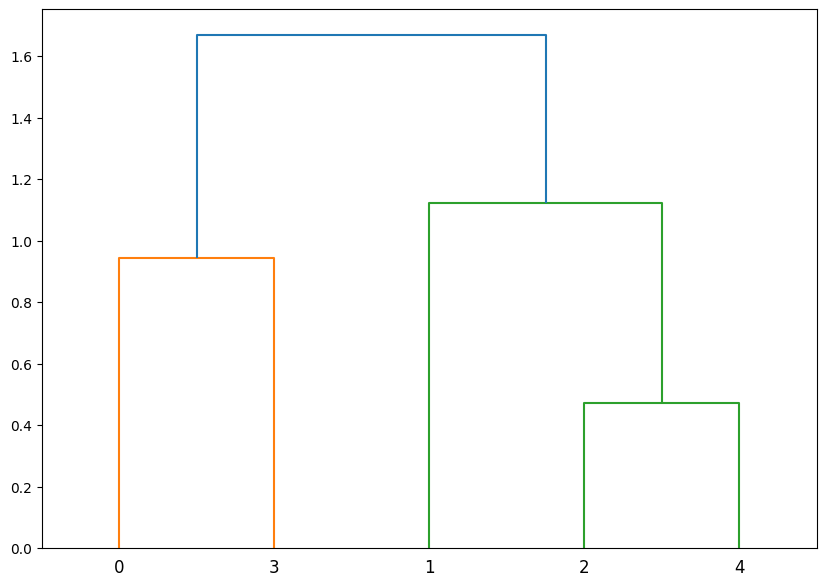

In [2]:
# Question 6: Implement an agglomerative hierarchical clustering on a non-Euclidian space (e.g.,textual data) using Gower's distance.

import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import pairwise_distances

# Sample textual data
data = [
    ['cat', 'dog', 'fish'],
    ['dog', 'fish'],
    ['fish', 'bird'],
    ['bird', 'dog', 'cat'],
    ['fish', 'cat']
]

# Convert text data into numerical representation
# We will use LabelEncoder to encode text into numerical values for simplicity
label_encoder = LabelEncoder()

# Ensure unique labels across all transactions
all_items = set(item for sublist in data for item in sublist)
label_encoder.fit(list(all_items))

# Encode data
encoded_data = [label_encoder.transform(list(transaction)) for transaction in data]

# Convert the encoded data into a DataFrame for easier manipulation
df = pd.DataFrame(encoded_data)

# Gower's distance calculation
def gower_distance(X, Y):
    return np.mean(X != Y)

# Calculate pairwise Gower's distance matrix
dist_matrix = np.array([[gower_distance(X, Y) for X in df.values] for Y in df.values])

# Perform agglomerative hierarchical clustering
Z = linkage(dist_matrix, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.show()
